# Classifier Evaluation Assignment

- Complete this Jupyter Notebook.  
- Execute the initial cells and answer the numbered questions.  
- Don't import other libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

results = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/lab-evaluation-data.csv')
results.head()

,actual,prob
0,0.0,0.380052
1,1.0,0.827923
2,1.0,0.929093
3,1.0,0.472508
4,1.0,0.906988


## Data Definitions
- `actual`: Whether the event was true or not. A value of 1.0 is True and 0.0 is False.  
- `prob`: The probability that the event was True. This is estimated from a classification model.

## Question 1
- Determine the distribution of the actual event.
- Would you be concerned about bias due to imbalance?

<AxesSubplot:>

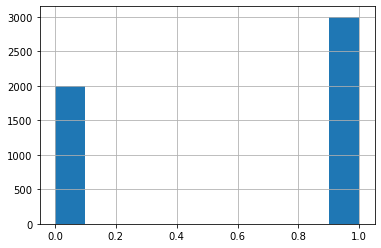

In [2]:
results['actual'].hist()

In [3]:
results['actual'].value_counts()

1.0    3000
0.0    2000
Name: actual, dtype: int64

### Insights from above plot
- The data doesn't have equal number of records for each of the classes (0 and 1) and this makes the data imbalanced
- Since the precentage split of classes is in the 60% and 40% ratio this should not limit the model from learning the underlying patters in both the classes

## Question 2
- Create a histogram that shows the distribution of the probabilities for the True and False classes.  
- Describe what you observe.

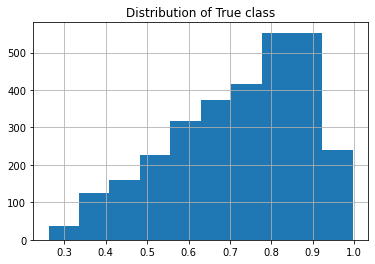

In [4]:
results[results['actual'] ==1]['prob'].hist()
plt.title('Distribution of True class')
plt.show()

- Since the probabilities belong to True class the plot is left tailed
- The left part of the histogram are the outcomes whose actual value is 1 but predicted to have less probality to be 1
- The right part of the histogram are the outcomes whose actual value is 1 and predicted to have more probality to be 1

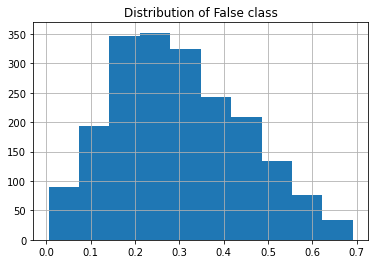

In [5]:
results[results['actual'] ==0]['prob'].hist()
plt.title('Distribution of False class')
plt.show()

- Since the probabilities belong to True class the plot is right tailed
- The left part of the histogram are the outcomes whose actual value is 0 and predicted to have less probality to be 1
- The right part of the histogram are the outcomes whose actual value is 0 but predicted to have more probality to be 1

## Question 3
- Create a simple confusion matrix. Use `0.5` as the threshold for whether an observation should be considered True or False.  
- Comment on what you observe.

In [6]:
results['pred'] = results['prob'].apply(lambda x : 1 if x>0.5 else 0 )
results['pred']

0       0
1       1
2       1
3       0
4       1
       ..
4995    0
4996    1
4997    1
4998    0
4999    1
Name: pred, Length: 5000, dtype: int64

In [7]:
results[['actual','pred']]

,actual,pred
0,0.0,0
1,1.0,1
2,1.0,1
3,1.0,0
4,1.0,1
...,...,...
4995,0.0,0
4996,1.0,1
4997,1.0,1
4998,0.0,0


In [8]:
tp = 0
tn = 0
fp = 0
fn = 0
#the confusion matrix has 2 classes: 0,1
#1=positive, 0=negative
for i in range(len(results['actual'])):
    if results['actual'][i] == results['pred'][i]:
        if results['actual'][i] == 1:
            tp += 1
        else:
            tn += 1
    else:
        if results['actual'][i] == 0:
            fp += 1
        else:
            fn += 1
matrix = np.zeros((2,2),int)
matrix[0,0] = tp
matrix[0,1] = fp
matrix[1,0] = fn
matrix[1,1] = tn 

In [9]:
matrix

array([[2623,  210],
       [ 377, 1790]])

### Insights from above matrix
- <b>True Positives</b>:For 2623 occasions, the model predicted True(1) while the actual value was True(1).
- <b>False Positives</b>:For 210 occasions, the model predicted True(1) while the actual value was False(0).
- <b>False Negatives</b>:For 377 occasions, the model predicted False(0) while the actual value was True(1)
- <b>True Negatives</b>:For 1790 occasions, the model predicted False(0) while the actual value was False(0).
- TP > TN as the data set is biased towards majority class (True or 1) 

## Question 4
- Calculate the accuracy, precision, and recall `without` using any pre-built functions.
- Which measure would you use if this was your model and why?

In [10]:
accuracy = (tp + tn)/(tp + tn + fp + fn)
accuracy

0.8826

### Precision & Recall for 1 class

In [11]:
precision_1 = tp/(tp + fp)
recall_1 = tp / (tp + fn)
print('Precision for class 1:',precision_1)
print("Recall for class 1:",recall_1)

Precision for class 1: 0.9258736321920226
Recall for class 1: 0.8743333333333333


### Precision & Recall for 0 class

In [12]:
precision_0 = tn/(tn + fn)
recall_0 = tn / (tn + fp)
print('Precision for class 0:',precision_0)
print("Recall for class 0:",recall_0)

Precision for class 0: 0.8260267651130595
Recall for class 0: 0.895


- It is difficult to decide which metric has greater impact without knowing the usecase of the model
- For the cancer detection models, we concentrate on decreasing  false negative rate for which recall has greater impact than precision
- For the spam detection models, we concentrate on decreasing  false positive rate for which precision has greater impact than recall
- From the confusion matrix the rate of FPR & FNR are almost equal to 11%. So accuracy might be good metric to measure 

## Question 5
- Construct a ROC curve plot.  
- Comment on the fit of the model based on this chart.

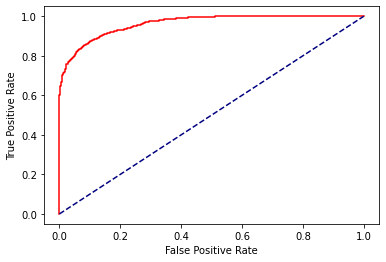

In [13]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(results['actual'],results['prob'])
plt.plot(fpr, tpr,'-r')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

### Insights from above plot
- Since there is lot of area under the curve, the model performance is not bad
- But there may be models that might give more TPR than FNR occupying larger area under the curves  